In [1]:
import numpy as np
import pandas as pd

In [3]:
treatment = pd.read_csv("treatment.csv.bz2", sep = '\t')
treatment.sample(5)

,treat,age,educ,ethn,married,re74,re75,re78,u74,u75
2087,False,46,16,other,True,38597.60,37596.80,48765.00,False,False
590,False,45,9,black,True,7837.07,8951.61,8866.36,False,False
501,False,49,4,black,True,0.00,0.00,0.00,True,True
1720,False,25,13,other,True,25470.50,18798.40,23643.60,False,False
284,False,22,12,black,True,13518.90,13427.40,12560.70,False,False


In [ ]:
#SKlearn predictions require an x and a y in matrix form

In [6]:
#creates a y for sklearn
#.values transform it from series
#
y = treatment.treat.values.astype('int')
y

array([1, 1, 1, ..., 0, 0, 0])

In [7]:
#is a one dimensional tuple
#this implies it is actually a vector
y.shape

(2675,)

In [14]:
#creates an x 
#is a problem that it is a vector
X = treatment.age.values

#new shape contains 2675 rows and 1 column
X = X.reshape((2675,1))

#you can use -1 instead, the -1 means "as many as needed"
X = X.reshape((-1,1))

#sklearn columns automatically add a column of constants if not told not to

array([[37],
       [30],
       [27],
       ...,
       [47],
       [54],
       [40]], dtype=int64)

linear prob model is a linear regression model

In [16]:
import sklearn.linear_model as slm

In [ ]:
#feeds in X and y
#adding .fit estimates using the inputed arguments
m = slm.LinearRegression().fit(X,y)

In [21]:
#no summary function means we have to hard query the values for intercept and coefficients
m.intercept_

0.24978167333871867

In [22]:
m.coef_

array([-0.00527739])

In [26]:
#this creates predicted values
haty = m.predict(X)

array([ 0.05451832,  0.09146003,  0.1072922 , ...,  0.00174444,
       -0.03519728,  0.03868616])

In [31]:
#we can compute residuals(e) with true value less predicted values
e = y - haty


In [29]:
import matplotlib.pyplot as plt

(array([468., 624., 364., 371., 374., 289.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  67.,  79.,  19.,
          9.,  11.]),
 array([-0.15478869, -0.12169379, -0.08859888, -0.05550398, -0.02240907,
         0.01068583,  0.04378073,  0.07687564,  0.10997054,  0.14306545,
         0.17616035,  0.20925525,  0.24235016,  0.27544506,  0.30853997,
         0.34163487,  0.37472977,  0.40782468,  0.44091958,  0.47401448,
         0.50710939,  0.54020429,  0.5732992 ,  0.6063941 ,  0.639489  ,
         0.67258391,  0.70567881,  0.73877372,  0.77186862,  0.80496352,
         0.83805843,  0.87115333,  0.90424824,  0.93734314,  0.97043804,
         1.00353295]),
 <a list of 35 Patch objects>)

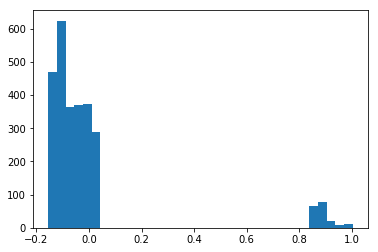

In [33]:
#the bimodal outcome is because
plt.hist(e, bins = 35)

In [36]:
m = slm.LogisticRegression().fit(X,y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
#currently predicting y
yhat = m.predict(X)

In [48]:
#we could also predict Pr(y = 1) or Pr(y = 0)
phat = m.predict_proba(X)
phat

array([[0.97015146, 0.02984854],
       [0.93377329, 0.06622671],
       [0.90789684, 0.09210316],
       ...,
       [0.99075524, 0.00924476],
       [0.9959685 , 0.0040315 ],
       [0.97894309, 0.02105691]])

In [49]:
#converts it back into boolean
#takes the second column for all rows and checks if its below .5
phat[:,1] > 5

array([False, False, False, ..., False, False, False])

In [50]:
m = slm.LogisticRegression().fit(X,y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
treatment.ethn.value_counts()

other       1803
black        780
hispanic      92
Name: ethn, dtype: int64

In [57]:
#squashes the ethn column into other(0) or not(1)
borh = (treatment.ethn != 'other').values.astype('int')


In [65]:
#this needs to be reshaped before
X = treatment.age.values.reshape((-1,1))
#hstack takes things and puts them horizontally near each other, wants matrices with equal number of rows
#cbind in R is the same
X = np.hstack((X, borh.reshape((-1,1))))
X

array([[37,  1],
       [30,  1],
       [27,  1],
       ...,
       [47,  0],
       [54,  1],
       [40,  0]], dtype=int64)

In [67]:
#repeat the same process
m = slm.LogisticRegression().fit(X,y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
yhat = m.predict(X)

In [69]:
#no positive indicators means that no one is predicted to have been treated. 
#this is clearly wrong
sum(yhat)

0

#if the outcome of the model is zero, in this context, does that mean that the inputs to the model lack predictive value
#A : the input of the two variables together(the way we coded them) are insufficient to predict

In [ ]:
#different direction

In [71]:
#takes re75 and converts it to a boolean
#this is specifically becuase we will try and measure the input as whether someone has income
inc75 = (treatment.re75 > 0).values.astype('int')

In [73]:
#this needs to be reshaped before
X = treatment.age.values.reshape((-1,1))
#hstack takes things and puts them horizontally near each other, wants matrices with equal number of rows
#cbind in R is the same
X = np.hstack((X, 
               borh.reshape((-1,1)),
               inc75.reshape((-1,1))))
X

array([[37,  1,  0],
       [30,  1,  0],
       [27,  1,  0],
       ...,
       [47,  0,  1],
       [54,  1,  1],
       [40,  0,  1]], dtype=int64)

In [76]:
#repeat the same process
m = slm.LogisticRegression().fit(X,y)
yhat = m.predict(X)
sum(yhat)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


112

In [77]:
pd.crosstab(y,yhat)

col_0,0,1
row_0,,
0,2463,27
1,100,85


In [78]:
#true negative plus true positive over the total number gives the percentage of correct predictions
(2463 + 85) / 2675

0.9525233644859813

In [ ]:
#add more variables

In [81]:


#this needs to be reshaped before
X = treatment.age.values.reshape((-1,1))
#hstack takes things and puts them horizontally near each other, wants matrices with equal number of rows
#cbind in R is the same
X = np.hstack((X, 
               borh.reshape((-1,1)),
               inc75.reshape((-1,1)),
               treatment.u75.values.astype('int').reshape((-1,1))
              ))
X

array([[37,  1,  0,  1],
       [30,  1,  0,  1],
       [27,  1,  0,  1],
       ...,
       [47,  0,  1,  0],
       [54,  1,  1,  0],
       [40,  0,  1,  0]], dtype=int64)

In [82]:
#repeat the same process
m = slm.LogisticRegression().fit(X,y)
yhat = m.predict(X)
sum(yhat)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


120

In [87]:
pd.crosstab(y,yhat)

col_0,0,1
row_0,,
0,2475,15
1,80,105


In [88]:
(2475 + 105) / 2675

0.9644859813084112